In [1]:
import os
import glob
import pandas as pd

# 기본 경로 (Live GPS Spoofing and Jamming 폴더)
base_path = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

# 폴더별 레이블 지정: Benign Flight -> 0, GPS Jamming -> 1, GPS Spoofing -> 2
folder_labels = {
    "Benign Flight": 0,
    "GPS Jamming": 1,
    "GPS Spoofing": 2
}

# 모든 데이터를 담을 리스트
all_data = []

# 각 폴더를 순회하면서 CSV 파일 읽기
for folder, label in folder_labels.items():
    folder_path = os.path.join(base_path, folder)
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    print(f"{folder} 폴더에서 {len(csv_files)}개의 CSV 파일 발견")
    for csv_file in csv_files:
        try:
            df = pd.read_csv(csv_file)
            # source_file 컬럼을 추가해서 어느 파일에서 온 데이터인지 표시 (옵션)
            df["source_file"] = os.path.basename(csv_file)
            # 레이블 컬럼 추가
            df["label"] = label
            all_data.append(df)
        except Exception as e:
            print(f"파일 {csv_file} 읽기 실패: {e}")

# 모든 데이터를 하나의 데이터프레임으로 병합
merged_df = pd.concat(all_data, ignore_index=True)

# 데이터프레임 정보 출력
print("병합된 데이터프레임 shape:", merged_df.shape)
print("병합된 데이터프레임의 컬럼들:") 
print(merged_df.columns)

# 상위 5개 샘플 출력
merged_df.head()


Benign Flight 폴더에서 60개의 CSV 파일 발견
GPS Jamming 폴더에서 60개의 CSV 파일 발견
GPS Spoofing 폴더에서 60개의 CSV 파일 발견
병합된 데이터프레임 shape: (293769, 831)
병합된 데이터프레임의 컬럼들:
Index(['timestamp', 'armed_time_ms', 'armed', 'prearmed', 'ready_to_arm',
       'lockdown', 'manual_lockdown', 'force_failsafe',
       'in_esc_calibration_mode', 'soft_stop',
       ...
       'innov_ve[0]', 'innov_ve[1]', 'innov_ve[2]', 'innov_ve[3]',
       'innov_ve[4]', 'weight[0]', 'weight[1]', 'weight[2]', 'weight[3]',
       'weight[4]'],
      dtype='object', length=831)


,timestamp,armed_time_ms,armed,prearmed,ready_to_arm,lockdown,manual_lockdown,force_failsafe,in_esc_calibration_mode,soft_stop,...,innov_ve[0],innov_ve[1],innov_ve[2],innov_ve[3],innov_ve[4],weight[0],weight[1],weight[2],weight[3],weight[4]
0,615220703,615220.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,615722327,615220.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,616228195,615220.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,616737101,615220.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,617247085,615220.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# 각 컬럼별 결측치 비율 계산
missing_ratio = merged_df.isna().mean().sort_values(ascending=False)
print("결측치 비율 상위 20개 컬럼:")
print(missing_ratio.head(20))

# 결측치 비율 50% 미만인 컬럼들만 선택
selected_cols = missing_ratio[missing_ratio < 0.5].index.tolist()
print("\n결측치 비율 50% 미만인 컬럼 개수:", len(selected_cols))

# 모델에 사용할 피처 컬럼을 선정 (타임스탬프, source_file, label는 제외)
features_all = [col for col in selected_cols if col not in ['timestamp', 'source_file', 'label']]
print("선택된 피처 개수:", len(features_all))


결측치 비율 상위 20개 컬럼:
previous.lat       1.00000
fake_hvel[0]       1.00000
aux_vvel           1.00000
fake_vpos          1.00000
fake_hpos[1]       1.00000
fake_hpos[0]       1.00000
fake_vvel          1.00000
fake_hvel[1]       1.00000
next.lat           1.00000
next.lon           1.00000
previous.lon       1.00000
current_seq        0.99999
current.lat        0.99999
driver_instance    0.99999
action             0.99999
timeout_ms         0.99999
current.lon        0.99999
count              0.99999
motor_number       0.99999
dataman_id         0.99999
dtype: float64

결측치 비율 50% 미만인 컬럼 개수: 3
선택된 피처 개수: 0


In [3]:
# 컬럼별 결측치 비율을 오름차순으로 확인
missing_ratio = merged_df.isna().mean().sort_values(ascending=True)
print("결측치 비율 90% 미만인 컬럼 개수:")
selected_cols_90 = missing_ratio[missing_ratio < 0.9].index.tolist()
print(len(selected_cols_90))

print("\n결측치 비율 90% 미만인 컬럼들 (상위 30개):")
print(selected_cols_90[:30])


결측치 비율 90% 미만인 컬럼 개수:
23

결측치 비율 90% 미만인 컬럼들 (상위 30개):
['timestamp', 'label', 'source_file', 'accelerometer_clipping', 'accelerometer_integral_dt', 'accelerometer_m_s2[2]', 'accelerometer_m_s2[0]', 'accelerometer_timestamp_relative', 'gyro_integral_dt', 'accelerometer_m_s2[1]', 'gyro_rad[1]', 'gyro_rad[0]', 'gyro_rad[2]', 'timestamp_sample', 'yaw', 'thrust_body[2]', 'thrust_body[0]', 'thrust_body[1]', 'xyz[0]', 'xyz[1]', 'xyz[2]', 'pitch', 'roll']


In [4]:
# 1. 90% 미만인 컬럼들 중에서 모델에 사용할 피처 컬럼 선정
features = [col for col in selected_cols_90 if col not in ['timestamp', 'label', 'source_file']]
print("선택된 피처들:")
print(features)

# 2. 피처 행렬 X와 레이블 y 구성
X = merged_df[features]
y = merged_df['label']

# 3. 결측치를 중위수(median)로 채우기
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 4. 표준화(스케일링) 수행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. 학습 데이터(80%)와 테스트 데이터(20%)로 분할 (레이블 비율 유지)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("학습 데이터 shape:", X_train.shape)
print("테스트 데이터 shape:", X_test.shape)


선택된 피처들:
['accelerometer_clipping', 'accelerometer_integral_dt', 'accelerometer_m_s2[2]', 'accelerometer_m_s2[0]', 'accelerometer_timestamp_relative', 'gyro_integral_dt', 'accelerometer_m_s2[1]', 'gyro_rad[1]', 'gyro_rad[0]', 'gyro_rad[2]', 'timestamp_sample', 'yaw', 'thrust_body[2]', 'thrust_body[0]', 'thrust_body[1]', 'xyz[0]', 'xyz[1]', 'xyz[2]', 'pitch', 'roll']
학습 데이터 shape: (235015, 20)
테스트 데이터 shape: (58754, 20)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Random Forest 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. 테스트 데이터에 대한 예측
y_pred = rf.predict(X_test)

# 3. 성능 평가: 분류 리포트와 혼동행렬 출력
print("=== 분류 리포트 ===")
print(classification_report(y_test, y_pred))

print("=== 혼동행렬 ===")
print(confusion_matrix(y_test, y_pred))


=== 분류 리포트 ===
              precision    recall  f1-score   support

           0       0.55      0.84      0.67     23925
           1       0.65      0.48      0.55     21556
           2       0.77      0.36      0.49     13273

    accuracy                           0.60     58754
   macro avg       0.66      0.56      0.57     58754
weighted avg       0.64      0.60      0.58     58754

=== 혼동행렬 ===
[[20178  3285   462]
 [10282 10319   955]
 [ 6228  2320  4725]]


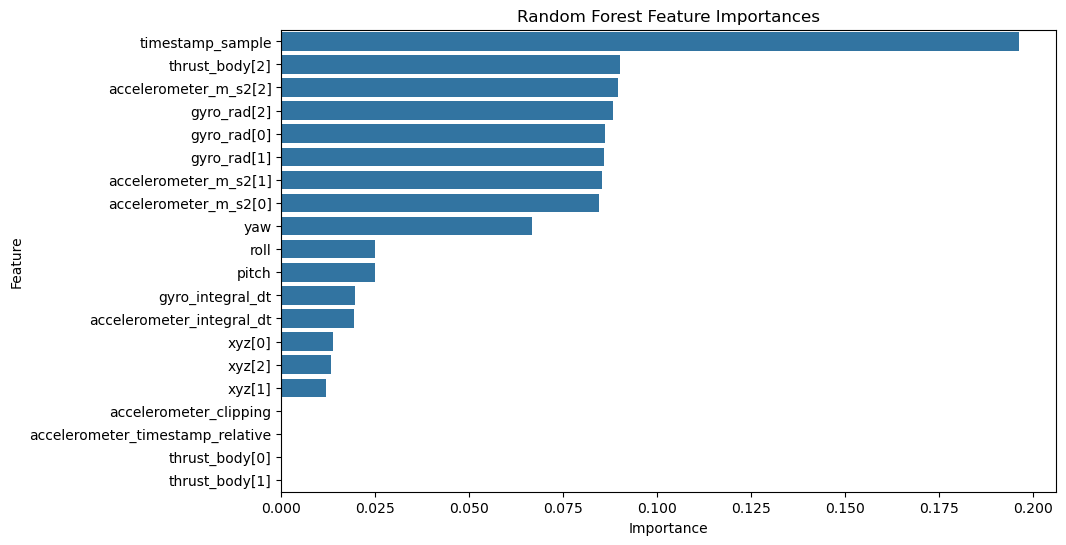

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Random Forest 모델의 피처 중요도 추출
importances = rf.feature_importances_
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1) timestamp_sample 제외한 피처 리스트
features_without_timestamp = [
    col for col in features 
    if col != 'timestamp_sample'
]

# 2) 피처/레이블 분리
X = merged_df[features_without_timestamp]
y = merged_df['label']

# 3) 결측치 처리
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 4) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Random Forest 학습
rf_no_timestamp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_timestamp.fit(X_train, y_train)
y_pred_no_timestamp = rf_no_timestamp.predict(X_test)

# 7) 성능 평가
print("=== [timestamp_sample 제거] 분류 리포트 ===")
print(classification_report(y_test, y_pred_no_timestamp))
print("=== 혼동행렬 ===")
print(confusion_matrix(y_test, y_pred_no_timestamp))


=== [timestamp_sample 제거] 분류 리포트 ===
              precision    recall  f1-score   support

           0       0.48      0.80      0.60     23925
           1       0.54      0.36      0.43     21556
           2       0.63      0.22      0.33     13273

    accuracy                           0.51     58754
   macro avg       0.55      0.46      0.45     58754
weighted avg       0.54      0.51      0.48     58754

=== 혼동행렬 ===
[[19127  4043   755]
 [12808  7782   966]
 [ 7769  2538  2966]]


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# (1) 하이퍼파라미터 후보
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# (2) GridSearchCV 설정
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,           # 교차 검증 folds 수
    scoring='accuracy',
    n_jobs=-1       # 병렬 처리
)

# (3) 학습: timestamp_sample 제거된 X_train, y_train 사용
grid_rf.fit(X_train, y_train)

# (4) 최적 파라미터 및 모델 확인
print("최적 하이퍼파라미터:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# (5) 테스트 세트 예측 및 성능 평가
y_pred_best = best_rf.predict(X_test)
print("=== [튜닝된 RF] 분류 리포트 ===")
print(classification_report(y_test, y_pred_best))
print("=== 혼동행렬 ===")
print(confusion_matrix(y_test, y_pred_best))


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
=== [튜닝된 RF] 분류 리포트 ===
              precision    recall  f1-score   support

           0       0.48      0.80      0.60     23925
           1       0.54      0.37      0.44     21556
           2       0.66      0.21      0.32     13273

    accuracy                           0.51     58754
   macro avg       0.56      0.46      0.45     58754
weighted avg       0.54      0.51      0.48     58754

=== 혼동행렬 ===
[[19219  4080   626]
 [12819  7906   831]
 [ 7840  2591  2842]]


In [9]:
import numpy as np
import pandas as pd

# 오버샘플링(SMOTE)
from imblearn.over_sampling import SMOTE

# XGBoost
import xgboost as xgb

# 모델 선택 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# 먼저 학습 데이터에 대해서만 SMOTE 적용
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("오버샘플링 전 학습 데이터 크기:", X_train.shape, "클래스 분포:", np.bincount(y_train))
print("오버샘플링 후 학습 데이터 크기:", X_train_sm.shape, "클래스 분포:", np.bincount(y_train_sm))


오버샘플링 전 학습 데이터 크기: (235015, 19) 클래스 분포: [95699 86226 53090]
오버샘플링 후 학습 데이터 크기: (287097, 19) 클래스 분포: [95699 95699 95699]


In [11]:
# 튜닝할 하이퍼파라미터 후보
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# XGBoost 모델 (use_label_encoder=False, eval_metric='mlogloss' 지정)
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',  # 다중 분류에서 균형 있게 평가하기 위해 f1_macro 사용
    cv=3,                # 3-Fold 교차검증
    n_jobs=-1            # 병렬 처리
)

print("=== XGBoost 하이퍼파라미터 튜닝 진행 중... ===")
grid_xgb.fit(X_train_sm, y_train_sm)
print("=== 튜닝 완료 ===")

print("최적 하이퍼파라미터:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_


=== XGBoost 하이퍼파라미터 튜닝 진행 중... ===


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== 튜닝 완료 ===
최적 하이퍼파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [12]:
y_pred = best_xgb.predict(X_test)

print("=== [튜닝된 XGBoost] 분류 리포트 ===")
print(classification_report(y_test, y_pred))

print("=== 혼동행렬 ===")
print(confusion_matrix(y_test, y_pred))

=== [튜닝된 XGBoost] 분류 리포트 ===
              precision    recall  f1-score   support

           0       0.58      0.40      0.48     23925
           1       0.44      0.67      0.53     21556
           2       0.45      0.33      0.38     13273

    accuracy                           0.48     58754
   macro avg       0.49      0.47      0.46     58754
weighted avg       0.50      0.48      0.48     58754

=== 혼동행렬 ===
[[ 9596 11721  2608]
 [ 4438 14454  2664]
 [ 2390  6501  4382]]


In [13]:
features_of_interest = [
    'jamming_indicator', 'noise_per_ms', 'satellites_used',
    'eph', 'epv', 'lat', 'lon', 'alt',
    'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]',
    'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
    'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]'
    # 필요하면 더 추가
]


In [14]:
import os
import glob
import pandas as pd

base_path = r"C:\Users\user\Desktop\UAVAttackData\Live GPS Spoofing and Jamming"

folder_labels = {
    "Benign Flight": 0,
    "GPS Jamming": 1,
    "GPS Spoofing": 2
}

all_data = []

for folder, label in folder_labels.items():
    folder_path = os.path.join(base_path, folder)
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    for csv_file in csv_files:
        try:
            df_temp = pd.read_csv(csv_file)
            # 관심 있는 컬럼만 골라서 사용
            existing_cols = [col for col in features_of_interest if col in df_temp.columns]
            if len(existing_cols) == 0:
                continue  # 이 파일에 필요한 컬럼이 하나도 없으면 스킵
            
            # 필요한 컬럼 + label
            df_temp = df_temp[existing_cols].copy()
            df_temp['label'] = label
            all_data.append(df_temp)
        except Exception as e:
            print(f"에러 발생: {csv_file}, {e}")

merged_df = pd.concat(all_data, ignore_index=True)
print("병합된 데이터 shape:", merged_df.shape)
print("병합된 데이터 컬럼:", merged_df.columns.tolist())
merged_df.head()


병합된 데이터 shape: (166738, 18)
병합된 데이터 컬럼: ['lat', 'lon', 'alt', 'label', 'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]', 'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]', 'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]', 'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used']


,lat,lon,alt,label,accelerometer_m_s2[0],accelerometer_m_s2[1],accelerometer_m_s2[2],gyro_rad[0],gyro_rad[1],gyro_rad[2],thrust_body[0],thrust_body[1],thrust_body[2],eph,epv,jamming_indicator,noise_per_ms,satellites_used
0,36.204816,138.252922,51.837490,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36.204815,138.252922,51.884552,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.204814,138.252923,52.977215,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0,0.215972,-0.032387,-9.642181,0.008719,0.000605,-0.000273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0,0.207217,-0.040210,-9.672564,0.010675,-0.000062,-0.000132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
missing_ratio = merged_df.isna().mean().sort_values(ascending=False)
print("결측치 비율 상위 20개:")
print(missing_ratio.head(20))


결측치 비율 상위 20개:
satellites_used          0.996342
noise_per_ms             0.996342
jamming_indicator        0.996342
lon                      0.978175
lat                      0.978175
alt                      0.978175
eph                      0.941969
epv                      0.941969
thrust_body[0]           0.782623
thrust_body[1]           0.782623
thrust_body[2]           0.782623
accelerometer_m_s2[1]    0.275456
accelerometer_m_s2[2]    0.275456
gyro_rad[0]              0.275456
gyro_rad[1]              0.275456
accelerometer_m_s2[0]    0.275456
gyro_rad[2]              0.275456
label                    0.000000
dtype: float64


In [16]:
from sklearn.impute import SimpleImputer

# label은 제외
feature_cols = [col for col in merged_df.columns if col != 'label']
X_raw = merged_df[feature_cols]
y = merged_df['label']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_raw)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("학습 세트 크기:", X_train.shape, "테스트 세트 크기:", X_test.shape)


학습 세트 크기: (133390, 17) 테스트 세트 크기: (33348, 17)


In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# 이미 전처리된 데이터: X_train, X_test, y_train, y_test
# (결측치 처리 및 스케일링이 완료된 상태여야 함)

# 1. Random Forest 모델 (전체 데이터 사용)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("==== Random Forest 모델 ====")
print(classification_report(y_test, y_pred_rf))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_rf))
print("-"*50)

# 2. XGBoost 모델 (전체 데이터 사용)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("==== XGBoost 모델 ====")
print(classification_report(y_test, y_pred_xgb))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_xgb))
print("-"*50)

# 3. Logistic Regression 모델 (전체 데이터 사용)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("==== Logistic Regression 모델 ====")
print(classification_report(y_test, y_pred_log))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_log))
print("-"*50)

# 4. SVM 모델 (RBF 커널, PCA로 차원 축소 후 사용)
# PCA로 차원 축소 (n_components 값은 데이터 특성에 따라 조정)
pca = PCA(n_components=10, random_state=42)  # 10 정도로 축소
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)

print("==== SVM (RBF + PCA) 모델 ====")
print(classification_report(y_test, y_pred_svm))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_svm))

print("-"*50)


==== Random Forest 모델 ====
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     13591
           1       0.57      0.56      0.57     12228
           2       0.66      0.36      0.46      7529

    accuracy                           0.59     33348
   macro avg       0.60      0.55      0.56     33348
weighted avg       0.60      0.59      0.58     33348

혼동행렬:
[[10002  3109   480]
 [ 4485  6870   873]
 [ 2884  1972  2673]]
--------------------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==== XGBoost 모델 ====
              precision    recall  f1-score   support

           0       0.53      0.77      0.63     13591
           1       0.55      0.46      0.50     12228
           2       0.65      0.30      0.41      7529

    accuracy                           0.55     33348
   macro avg       0.58      0.51      0.51     33348
weighted avg       0.57      0.55      0.53     33348

혼동행렬:
[[10473  2799   319]
 [ 5698  5634   896]
 [ 3446  1815  2268]]
--------------------------------------------------
==== Logistic Regression 모델 ====
              precision    recall  f1-score   support

           0       0.43      0.97      0.60     13591
           1       0.46      0.09      0.15     12228
           2       0.68      0.05      0.09      7529

    accuracy                           0.44     33348
   macro avg       0.53      0.37      0.28     33348
weighted avg       0.50      0.44      0.32     33348

혼동행렬:
[[13182   381    28]
 [10989  1102   137]
 [ 6272   904  

In [42]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 전처리 후, X_scaled와 y가 준비되어 있다고 가정합니다.
# 예시: X_scaled, y 는 결측치 대체, 스케일링 등이 완료된 데이터

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE 적용: 학습 데이터에만 적용합니다.
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("SMOTE 적용 전 학습 클래스 분포:", np.bincount(y_train))
print("SMOTE 적용 후 학습 클래스 분포:", np.bincount(y_train_sm))
print("-"*50)

# 1. Random Forest 모델 (SMOTE 적용 데이터 사용)
rf_model_sm = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_model_sm.predict(X_test)

print("==== Random Forest (SMOTE 적용) 모델 ====")
print(classification_report(y_test, y_pred_rf_sm))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_rf_sm))
print("-"*50)

# 2. XGBoost 모델 (SMOTE 적용 데이터 사용)
xgb_model_sm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_sm.fit(X_train_sm, y_train_sm)
y_pred_xgb_sm = xgb_model_sm.predict(X_test)

print("==== XGBoost (SMOTE 적용) 모델 ====")
print(classification_report(y_test, y_pred_xgb_sm))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_xgb_sm))
print("-"*50)

# 3. Logistic Regression 모델 (SMOTE 적용 데이터 사용)
log_model_sm = LogisticRegression(max_iter=1000, random_state=42)
log_model_sm.fit(X_train_sm, y_train_sm)
y_pred_log_sm = log_model_sm.predict(X_test)

print("==== Logistic Regression (SMOTE 적용) 모델 ====")
print(classification_report(y_test, y_pred_log_sm))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_log_sm))
print("-"*50)


SMOTE 적용 전 학습 클래스 분포: [54365 48911 30114]
SMOTE 적용 후 학습 클래스 분포: [54365 54365 54365]
--------------------------------------------------
==== Random Forest (SMOTE 적용) 모델 ====
              precision    recall  f1-score   support

           0       0.62      0.64      0.63     13591
           1       0.58      0.56      0.57     12228
           2       0.51      0.50      0.50      7529

    accuracy                           0.58     33348
   macro avg       0.57      0.57      0.57     33348
weighted avg       0.58      0.58      0.58     33348

혼동행렬:
[[8679 3173 1739]
 [3449 6846 1933]
 [1943 1804 3782]]
--------------------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==== XGBoost (SMOTE 적용) 모델 ====
              precision    recall  f1-score   support

           0       0.59      0.56      0.58     13591
           1       0.55      0.46      0.50     12228
           2       0.40      0.55      0.47      7529

    accuracy                           0.52     33348
   macro avg       0.52      0.52      0.51     33348
weighted avg       0.53      0.52      0.52     33348

혼동행렬:
[[7595 3081 2915]
 [3402 5630 3196]
 [1775 1599 4155]]
--------------------------------------------------
==== Logistic Regression (SMOTE 적용) 모델 ====
              precision    recall  f1-score   support

           0       0.67      0.23      0.35     13591
           1       0.40      0.46      0.43     12228
           2       0.29      0.56      0.39      7529

    accuracy                           0.39     33348
   macro avg       0.45      0.42      0.39     33348
weighted avg       0.49      0.39      0.38     33348

혼동행렬:
[[3175 5703 4713]
 [1118 5636 5474]
 [ 419 2

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 이미 전처리된 데이터(X_scaled, y)가 있다고 가정합니다.
# 학습/테스트 분할 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 1. SMOTE 적용 (학습 데이터에만 적용)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("SMOTE 적용 전 학습 클래스 분포:", np.bincount(y_train))
print("SMOTE 적용 후 학습 클래스 분포:", np.bincount(y_train_sm))
print("-"*50)

# 2. 기본 모델(베이스 추정기) 정의
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, 
                                  class_weight='balanced', n_jobs=-1)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', 
                              random_state=42)),
    ('log', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
]

# 3. 스태킹 앙상블 모델 구성: 최종 메타 분류기는 로지스틱 회귀
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    cv=5,  # 교차검증 분할 수
    n_jobs=-1
)

# 4. 스태킹 앙상블 모델 학습 (SMOTE 적용된 학습 데이터 사용)
stacking_model.fit(X_train_sm, y_train_sm)

# 5. 테스트 데이터에 대해 예측 및 평가
y_pred_stack = stacking_model.predict(X_test)

print("==== 스태킹 앙상블 모델 (SMOTE 적용) ====")
print(classification_report(y_test, y_pred_stack))
print("혼동행렬:")
print(confusion_matrix(y_test, y_pred_stack))


SMOTE 적용 전 학습 클래스 분포: [54365 48911 30114]
SMOTE 적용 후 학습 클래스 분포: [54365 54365 54365]
--------------------------------------------------
==== 스태킹 앙상블 모델 (SMOTE 적용) ====
              precision    recall  f1-score   support

           0       0.61      0.65      0.63     13591
           1       0.56      0.57      0.56     12228
           2       0.53      0.47      0.50      7529

    accuracy                           0.58     33348
   macro avg       0.57      0.56      0.56     33348
weighted avg       0.58      0.58      0.58     33348

혼동행렬:
[[8822 3401 1368]
 [3615 6929 1684]
 [1996 2023 3510]]


C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_10864\1575796717.py:24: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from 

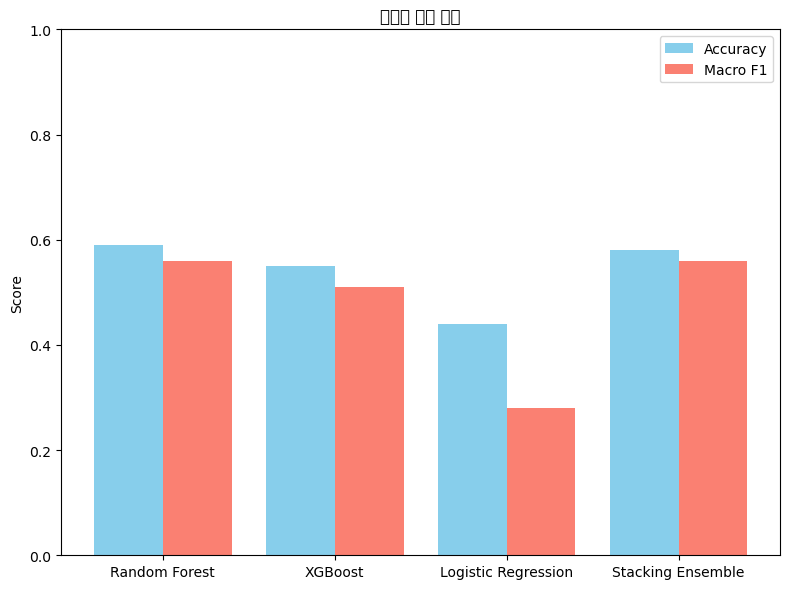

In [46]:
import matplotlib.pyplot as plt

# 모델별 성능 (예시 수치)
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Stacking Ensemble']
accuracy_scores = [0.59, 0.55, 0.44, 0.58]       # 전체 정확도
macro_f1_scores = [0.56, 0.51, 0.28, 0.56]         # macro avg f1-score

# 바 차트 그리기
fig, ax = plt.subplots(figsize=(8,6))
x = range(len(model_names))
bar_width = 0.4

# Accuracy와 Macro F1를 옆으로 나란히 표시
ax.bar(x, accuracy_scores, width=bar_width, label='Accuracy', color='skyblue')
ax.bar([i + bar_width for i in x], macro_f1_scores, width=bar_width, label='Macro F1', color='salmon')

ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('모델별 성능 비교')
ax.legend()

plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# 새 데이터셋 파일 경로 (실제 경로로 수정)
new_data_path = r"C:\Users\user\Desktop\UAVAttackData\synthetic_new_data.csv"

# 새 데이터셋 불러오기
new_df = pd.read_csv(new_data_path)
print("새 데이터셋 shape:", new_df.shape)
print(new_df.head())

# 전처리: 학습 시 사용했던 feature 컬럼만 선택 (예: feature_cols는 미리 정의한 리스트)
# 예시로, 전처리 과정에서 사용했던 변수들을 new_df에서도 동일하게 선택합니다.
new_X_raw = new_df[feature_cols]   # feature_cols: 전처리 시 사용한 피처 리스트
# imputer와 scaler는 이전에 fit한 객체를 재사용합니다.
new_X_imputed = imputer.transform(new_X_raw)
new_X_scaled = scaler.transform(new_X_imputed)

# 만약 새 데이터셋에 label 컬럼이 있다면 평가 가능
if 'label' in new_df.columns:
    new_y = new_df['label']
else:
    new_y = None

# 학습한 스태킹 앙상블 모델(또는 다른 최종 모델)을 사용해 예측합니다.
new_predictions = stacking_model.predict(new_X_scaled)

if new_y is not None:
    print("새 데이터셋 분류 리포트:")
    print(classification_report(new_y, new_predictions))
    print("혼동행렬:")
    print(confusion_matrix(new_y, new_predictions))
else:
    print("새 데이터셋 예측 결과 (상위 20개):")
    print(new_predictions[:20])


새 데이터셋 shape: (1000, 21)
   accelerometer_clipping  accelerometer_integral_dt  accelerometer_m_s2[2]  \
0                0.048522                   0.088407              -1.351074   
1               -0.830950                   1.477530              -1.322458   
2                0.270457                  -1.141689               0.481866   
3               -0.050238                  -0.193659               0.547265   
4               -0.238948                  -0.716822               0.548884   

   accelerometer_m_s2[0]  accelerometer_timestamp_relative  gyro_integral_dt  \
0               0.500240                          0.657763         -0.227106   
1              -0.533600                         -0.069532         -0.141758   
2               1.220821                         -1.186993          0.135563   
3              -0.876774                          1.057814          0.728519   
4               1.712040                         -0.589112          0.637606   

   accelerometer_m_

KeyError: "['lat', 'lon', 'alt', 'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used'] not in index"

In [52]:
# 기존 학습 시 사용한 피처 리스트 (예시; 실제 학습 시 사용한 feature_cols를 사용하세요)
feature_cols = ['lat', 'lon', 'alt', 'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 
                'accelerometer_m_s2[2]', 'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]', 
                'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]', 
                'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used']

# 새 데이터셋 new_df는 현재 21개의 컬럼을 가지고 있지만, feature_cols의 일부는 포함되어 있지 않음.
# 새 데이터셋을 학습 시 사용했던 피처 순서대로 재구성하고, 없는 컬럼은 NaN으로 채워줍니다.
new_X_raw = new_df.reindex(columns=feature_cols)

# 재구성된 새 데이터셋 확인
print("새 데이터셋 재구성 후 shape:", new_X_raw.shape)
print(new_X_raw.head())

# 이후, 학습 시 fit한 imputer와 scaler를 사용합니다.
new_X_imputed = imputer.transform(new_X_raw)
new_X_scaled = scaler.transform(new_X_imputed)

# 만약 새 데이터셋에 label 컬럼이 있다면
if 'label' in new_df.columns:
    new_y = new_df['label']
else:
    new_y = None

# 스태킹 앙상블 모델(또는 사용 중인 최종 모델)로 예측
new_predictions = stacking_model.predict(new_X_scaled)

if new_y is not None:
    print("새 데이터셋 분류 리포트:")
    print(classification_report(new_y, new_predictions))
    print("혼동행렬:")
    print(confusion_matrix(new_y, new_predictions))
else:
    print("새 데이터셋 예측 결과 (상위 20개):")
    print(new_predictions[:20])


새 데이터셋 재구성 후 shape: (1000, 17)
   lat  lon  alt  accelerometer_m_s2[0]  accelerometer_m_s2[1]  \
0  NaN  NaN  NaN               0.500240              -1.223220   
1  NaN  NaN  NaN              -0.533600               1.424628   
2  NaN  NaN  NaN               1.220821               1.551245   
3  NaN  NaN  NaN              -0.876774               0.882286   
4  NaN  NaN  NaN               1.712040              -0.761588   

   accelerometer_m_s2[2]  gyro_rad[0]  gyro_rad[1]  gyro_rad[2]  \
0              -1.351074    -0.600339    -0.800335    -0.403703   
1              -1.322458     0.593539    -0.498987     0.829149   
2               0.481866     0.003060     1.744861    -2.391079   
3               0.547265     0.584623     2.404838    -1.019801   
4               0.548884     0.237830     0.217208     0.979260   

   thrust_body[0]  thrust_body[1]  thrust_body[2]  eph  epv  \
0       -1.122901        0.012814       -1.525615  NaN  NaN   
1        1.667798       -1.168491        0.

In [54]:
import numpy as np
import pandas as pd

# 학습 시 사용한 feature_cols 
feature_cols = [
    'lat', 'lon', 'alt',
    'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]',
    'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
    'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]',
    'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used'
]

n_samples = 1000

# 각 피처에 대해 임의의 데이터를 생성
# GPS 관련 피처: 실제 위도, 경도, 고도 범위 가정
lat = np.random.uniform(35, 37, n_samples)       # 위도
lon = np.random.uniform(137, 139, n_samples)       # 경도
alt = np.random.uniform(0, 100, n_samples)         # 고도 (미터 단위)

# 가속도계 값: 평균 0, 표준편차 1의 정규분포
accel0 = np.random.normal(0, 1, n_samples)
accel1 = np.random.normal(0, 1, n_samples)
accel2 = np.random.normal(0, 1, n_samples)

# 자이로 센서 값: 평균 0, 표준편차 0.5
gyro0 = np.random.normal(0, 0.5, n_samples)
gyro1 = np.random.normal(0, 0.5, n_samples)
gyro2 = np.random.normal(0, 0.5, n_samples)

# thrust_body: 평균 0, 표준편차 1
thrust0 = np.random.normal(0, 1, n_samples)
thrust1 = np.random.normal(0, 1, n_samples)
thrust2 = np.random.normal(0, 1, n_samples)

# eph, epv: GPS 정확도 관련, 양의 값 (예: 평균 1, 표준편차 0.5)
eph = np.abs(np.random.normal(1, 0.5, n_samples))
epv = np.abs(np.random.normal(1, 0.5, n_samples))

# jamming_indicator: 0 또는 1 (예: 10% 확률로 1, 나머지 0)
jamming_indicator = np.random.binomial(1, 0.1, n_samples).astype(float)

# noise_per_ms: 평균 100, 표준편차 5
noise = np.random.normal(100, 5, n_samples)

# satellites_used: 정수 값, 예를 들어 5~15 사이
satellites_used = np.random.randint(5, 16, n_samples).astype(float)

# 데이터 딕셔너리 구성 (feature_cols 순서대로)
data = {
    'lat': lat,
    'lon': lon,
    'alt': alt,
    'accelerometer_m_s2[0]': accel0,
    'accelerometer_m_s2[1]': accel1,
    'accelerometer_m_s2[2]': accel2,
    'gyro_rad[0]': gyro0,
    'gyro_rad[1]': gyro1,
    'gyro_rad[2]': gyro2,
    'thrust_body[0]': thrust0,
    'thrust_body[1]': thrust1,
    'thrust_body[2]': thrust2,
    'eph': eph,
    'epv': epv,
    'jamming_indicator': jamming_indicator,
    'noise_per_ms': noise,
    'satellites_used': satellites_used
}
s
# 새 데이터셋 DataFrame 생성 (열 순서는 feature_cols에 맞게)
new_synthetic_df = pd.DataFrame(data, columns=feature_cols)

# 새 데이터셋 미리보기
print("새로운 데이터셋 (상위 5개 샘플):")
print(new_synthetic_df.head())

# CSV 파일로 저장 (경로를 실제 환경에 맞게 수정)
new_data_path = r"C:\Users\user\Desktop\UAVAttackData\synthetic_new_data_aligned.csv"
new_synthetic_df.to_csv(new_data_path, index=False)
print("새로운 데이터셋이 다음 경로에 저장되었습니다:", new_data_path)


새로운 데이터셋 (상위 5개 샘플):
         lat         lon        alt  accelerometer_m_s2[0]  \
0  36.442416  137.774312  89.746026              -0.351567   
1  35.482316  138.512081  25.754488               0.280463   
2  35.020574  138.919478  67.641305              -1.233137   
3  36.637170  137.047107  97.521478               0.868419   
4  36.351584  138.376227  99.343477              -0.725684   

   accelerometer_m_s2[1]  accelerometer_m_s2[2]  gyro_rad[0]  gyro_rad[1]  \
0              -0.550167              -1.062595    -0.103981    -0.478926   
1               0.708113               0.906597     0.602287    -0.806352   
2              -0.500353              -0.037571    -0.620737     0.084926   
3               0.301900              -0.167477     0.671965    -0.196764   
4               0.836581              -0.471251     0.816546    -0.022125   

   gyro_rad[2]  thrust_body[0]  thrust_body[1]  thrust_body[2]       eph  \
0    -0.267493        0.005000       -1.109451        0.685779  1.1

In [56]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# 새 데이터셋 파일 경로 (이전에 저장한 경로 사용)
new_data_path = r"C:\Users\user\Desktop\UAVAttackData\synthetic_new_data_aligned.csv"

# 새 데이터셋 불러오기
new_data = pd.read_csv(new_data_path)
print("새 데이터셋 shape:", new_data.shape)
print(new_data.head())

# 학습 시 사용했던 feature_cols (이전 코드에서 사용한 리스트와 동일)
feature_cols = [
    'lat', 'lon', 'alt',
    'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]',
    'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
    'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]',
    'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used'
]

# 새 데이터셋을 학습 시 사용한 피처 순서대로 재구성 (이미 맞춰진 상태일 것임)
new_X_raw = new_data[feature_cols]

# 학습 시 fit한 imputer와 scaler 재사용
new_X_imputed = imputer.transform(new_X_raw)
new_X_scaled = scaler.transform(new_X_imputed)

# 여기서는 새 데이터셋에 label이 없다고 가정하고, 예측 결과만 확인합니다.
new_predictions = stacking_model.predict(new_X_scaled)

print("새 데이터셋 예측 결과 (상위 20개):")
print(new_predictions[:20])


새 데이터셋 shape: (1000, 17)
         lat         lon        alt  accelerometer_m_s2[0]  \
0  36.442416  137.774312  89.746026              -0.351567   
1  35.482316  138.512081  25.754488               0.280463   
2  35.020574  138.919478  67.641305              -1.233137   
3  36.637170  137.047107  97.521478               0.868419   
4  36.351584  138.376227  99.343477              -0.725684   

   accelerometer_m_s2[1]  accelerometer_m_s2[2]  gyro_rad[0]  gyro_rad[1]  \
0              -0.550167              -1.062595    -0.103981    -0.478926   
1               0.708113               0.906597     0.602287    -0.806352   
2              -0.500353              -0.037571    -0.620737     0.084926   
3               0.301900              -0.167477     0.671965    -0.196764   
4               0.836581              -0.471251     0.816546    -0.022125   

   gyro_rad[2]  thrust_body[0]  thrust_body[1]  thrust_body[2]       eph  \
0    -0.267493        0.005000       -1.109451        0.685779 

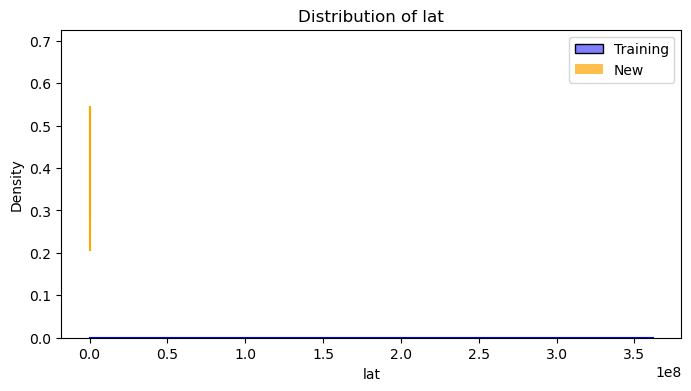

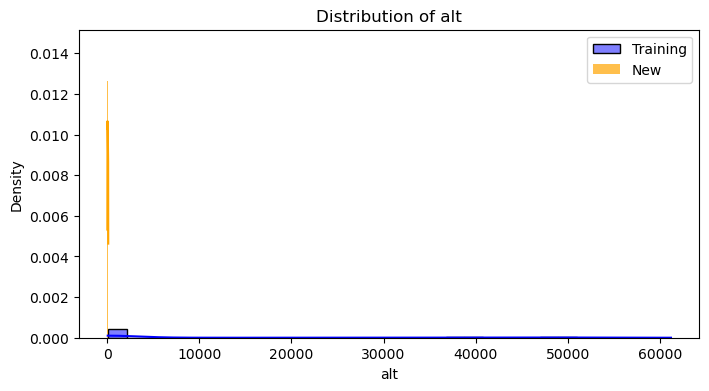

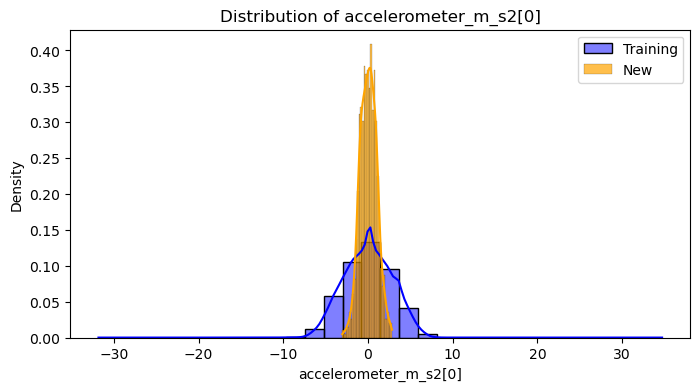

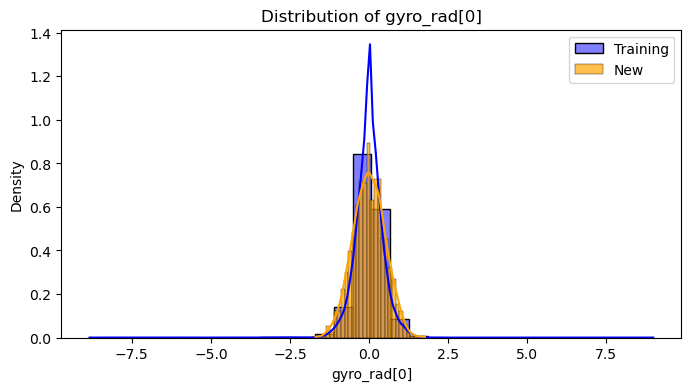

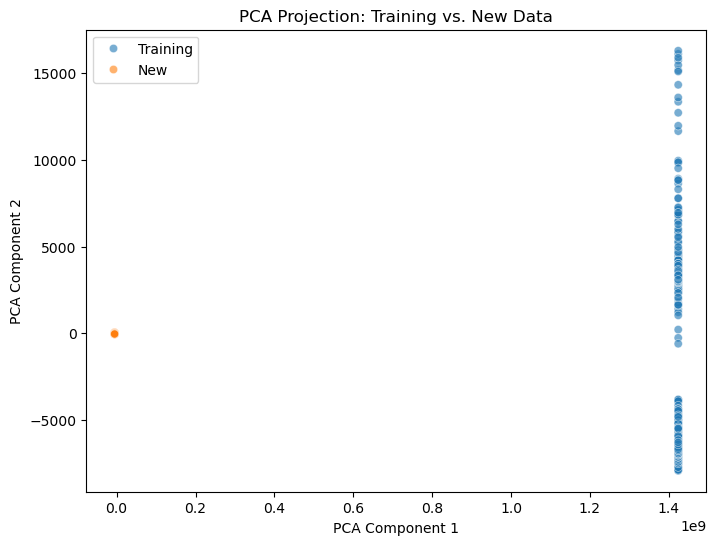

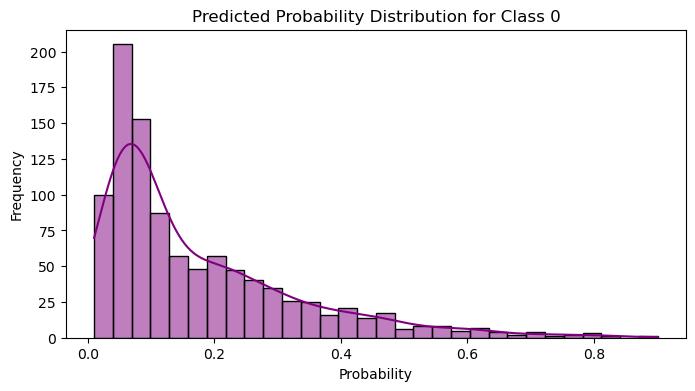

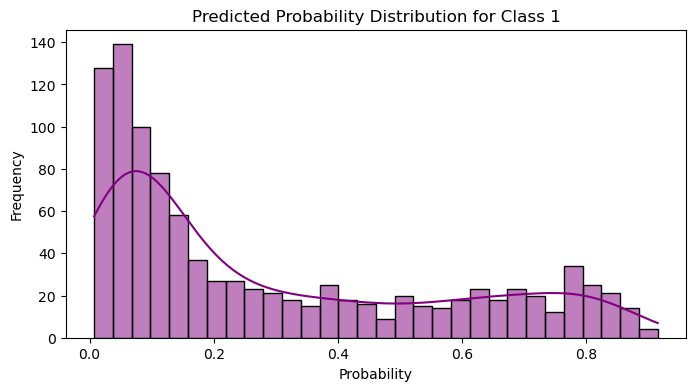

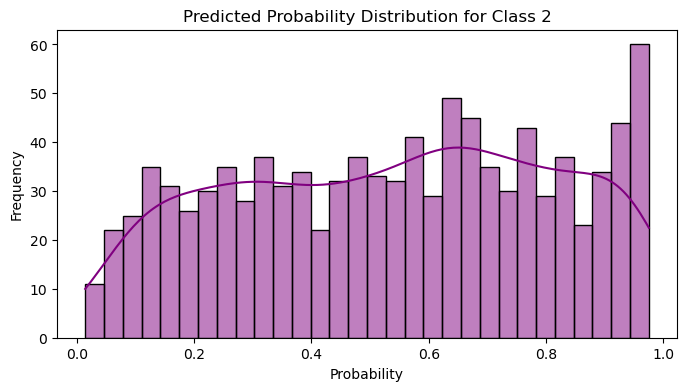

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# ===== 가정 사항 =====
# 1. feature_cols: 학습 시 사용했던 숫자형 피처 목록
# 2. merged_df: 학습 데이터 원본 (feature_cols가 포함되어 있음)
# 3. new_synthetic_df: 새로 생성한 데이터셋 (feature_cols가 동일)
# 4. imputer, scaler, stacking_model 등은 이미 학습/fit된 상태

# [1] 학습 데이터와 새 데이터셋 준비
feature_cols = [
    'lat', 'lon', 'alt',
    'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]', 'accelerometer_m_s2[2]',
    'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
    'thrust_body[0]', 'thrust_body[1]', 'thrust_body[2]',
    'eph', 'epv', 'jamming_indicator', 'noise_per_ms', 'satellites_used'
]

# 학습 데이터 (원본)
train_df = merged_df[feature_cols].copy()

# 새 데이터셋
# 예: new_synthetic_df = pd.read_csv(r"C:\Users\user\Desktop\UAVAttackData\synthetic_new_data_aligned.csv")
# 이미 new_synthetic_df가 로드된 상태라고 가정

# ===== 1. 피처 분포 비교 (히스토그램/커널 밀도) =====
selected_features = ['lat', 'alt', 'accelerometer_m_s2[0]', 'gyro_rad[0]']

for feature in selected_features:
    plt.figure(figsize=(8,4))
    # 학습 데이터 분포
    sns.histplot(train_df[feature].dropna(), color='blue', label='Training',
                 kde=True, stat="density", bins=30)
    # 새 데이터셋 분포
    sns.histplot(new_synthetic_df[feature].dropna(), color='orange', label='New',
                 kde=True, stat="density", bins=30, alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# ===== 2. PCA를 이용한 데이터 분포 시각화 ===== 
# (1) 데이터셋 구분 열 추가
train_df_copy = train_df.copy()
train_df_copy['dataset'] = 'Training'

new_df_copy = new_synthetic_df.copy()
new_df_copy['dataset'] = 'New'

# (2) 두 데이터셋 결합
combined_df = pd.concat([train_df_copy, new_df_copy], ignore_index=True)

# (3) 결측치 처리: feature_cols(숫자형 피처)에 대해서만 중간값으로 대체
combined_df_filled = combined_df.copy()
combined_df_filled[feature_cols] = combined_df_filled[feature_cols].fillna(
    combined_df_filled[feature_cols].median()
)

# (4) PCA 적용
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(combined_df_filled[feature_cols])
combined_df_filled['pca1'] = pca_result[:, 0]
combined_df_filled['pca2'] = pca_result[:, 1]

# (5) 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df_filled, x='pca1', y='pca2', hue='dataset', alpha=0.6)
plt.title("PCA Projection: Training vs. New Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# ===== 3. 예측 확률 분포 분석 (스태킹 앙상블 모델 예시) =====
# (1) 새 데이터셋 전처리 (imputer, scaler 재사용)
new_X_raw = new_synthetic_df[feature_cols]
new_X_imputed = imputer.transform(new_X_raw)
new_X_scaled = scaler.transform(new_X_imputed)

# (2) 예측 확률
new_probs = stacking_model.predict_proba(new_X_scaled)  # (n_samples, n_classes)
n_classes = new_probs.shape[1]

for i in range(n_classes):
    plt.figure(figsize=(8,4))
    sns.histplot(new_probs[:, i], bins=30, kde=True, color='purple')
    plt.title(f"Predicted Probability Distribution for Class {i}")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()
